# Principal Component Analysis (PCA)

We want to see how PCA, together with different preprocessing techniques, affects our dataset.

In [1]:
# The percentage of information we want to keep
RATIO = 0.90

# RATIO = 0.95

In [2]:
from preprocessing import load_dataset, split_dataset, grid_search, corresponding_features_interaction, corresponding_features_custom_interaction
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np

First, we import our dataset and we split it.

In [3]:
# first, we load the dataset
X, y = load_dataset('./data/data.pkl')
# then, we split it
X_tr, y_tr, X_te, y_te = split_dataset(X, y, test=0.2, stratify=True)

# Scale the features
scaler = StandardScaler()

### 1. Without interaction
We scale the features.

In [4]:
X_tr_scaled = scaler.fit_transform(X_tr)

We use PCA to get the list of features and plot which ones have the most explanatory power, or have the most variance: these are the principle components.

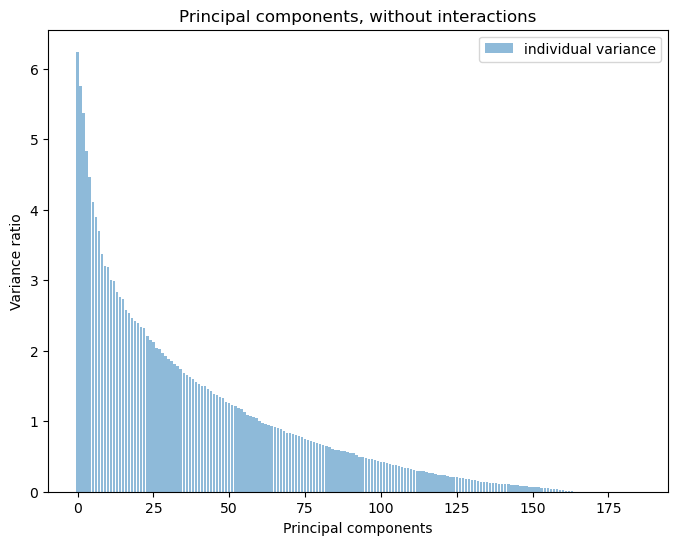

In [5]:
# Visualize
pca = PCA()
X_pca = pca.fit_transform(X_tr_scaled)
pca_variance = pca.explained_variance_

plt.figure(figsize=(8, 6))
plt.title('Principal components, without interactions')
plt.bar(range(pca_variance.size), pca_variance, alpha=0.5, align='center', label='individual variance')
plt.legend()
plt.ylabel('Variance ratio')
plt.xlabel('Principal components')
plt.show()

Now, we want to see how many features explain 90-95% of our dataset.

In [6]:
bound_variance = np.sum(pca_variance)*RATIO
sum_variance = 0

for i in range(pca_variance.size):
    sum_variance = pca_variance[i] + sum_variance
    if sum_variance >= bound_variance:
        useful_feats = i
        break

print(f'Ratio: {RATIO}, bound variance: {bound_variance}')
print(f'---> Useful feats: {i}')
print(f'\tVariance sum: {sum_variance}')
print(f'\tPercentage: {sum_variance*100/np.sum(pca_variance):.2f} %')

Ratio: 0.9, bound variance: 158.48398727465542
---> Useful feats: 87
	Variance sum: 158.54798740291565
	Percentage: 90.04 %


These results suggest that 87-106 features are enough to represent 90-95% of our data.

Finally, we want to show the first two principal components. 

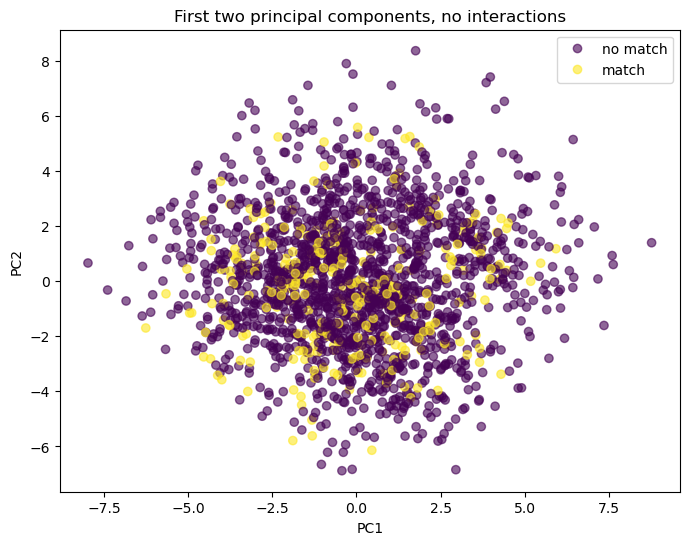

In [7]:
# Show first two principal components with scaler
plt.figure(figsize=(8,6))
plot = plt.scatter(X_pca[:,0], X_pca[:,1], c=y_tr, alpha=0.6)
plt.legend(handles=plot.legend_elements()[0], labels=['no match', 'match'])
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("First two principal components, no interactions")
plt.show()

### 2. With interactions (and no drop)

We repeat the previous operations, to see how the interaction affects our results.

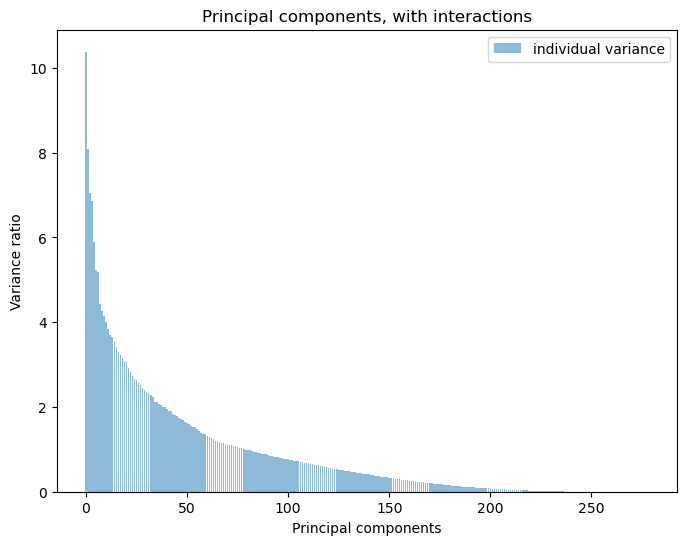

In [8]:
X_tr_int = corresponding_features_interaction(X_tr, drop=False)
X_tr_scaled = scaler.fit_transform(X_tr_int)

# Visualize
pca = PCA()
X_pca = pca.fit_transform(X_tr_scaled)
pca_variance = pca.explained_variance_

plt.figure(figsize=(8, 6))
plt.title('Principal components, with interactions')
plt.bar(range(pca_variance.size), pca_variance, alpha=0.5, align='center', label='individual variance')
plt.legend()
plt.ylabel('Variance ratio')
plt.xlabel('Principal components')
plt.show()

In [9]:
bound_variance = np.sum(pca_variance)*RATIO
sum_variance = 0

for i in range(pca_variance.size):
    sum_variance = pca_variance[i] + sum_variance
    if sum_variance >= bound_variance:
        useful_feats = i
        break

print(f'Ratio: {RATIO}, bound variance: {bound_variance}')
print(f'---> Useful feats: {i}')
print(f'\tVariance sum: {sum_variance}')
print(f'\tPercentage: {sum_variance*100/np.sum(pca_variance):.2f} %')

Ratio: 0.9, bound variance: 229.62168610816548
---> Useful feats: 117
	Variance sum: 229.9884151709304
	Percentage: 90.14 %


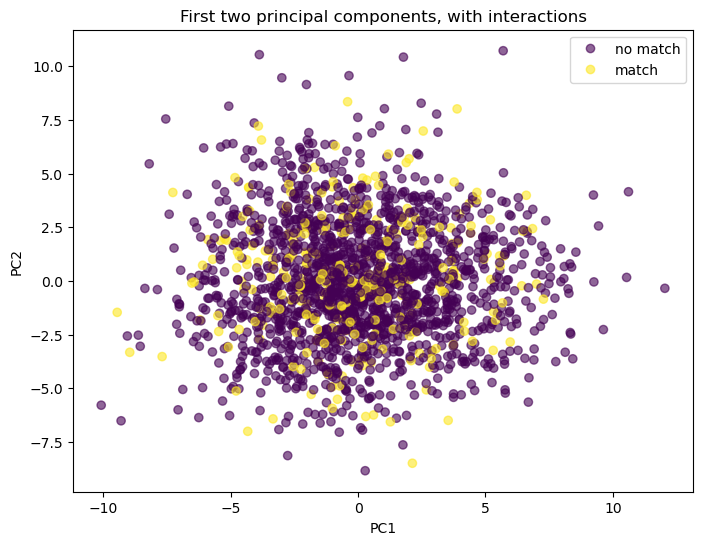

In [10]:
# Show first two principal components with scaler
plt.figure(figsize=(8,6))
plot = plt.scatter(X_pca[:,0], X_pca[:,1], c=y_tr, alpha=0.6)
plt.legend(handles=plot.legend_elements()[0], labels=['no match', 'match'])
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("First two principal components, with interactions")
plt.show()

### 3. With interactions and drop

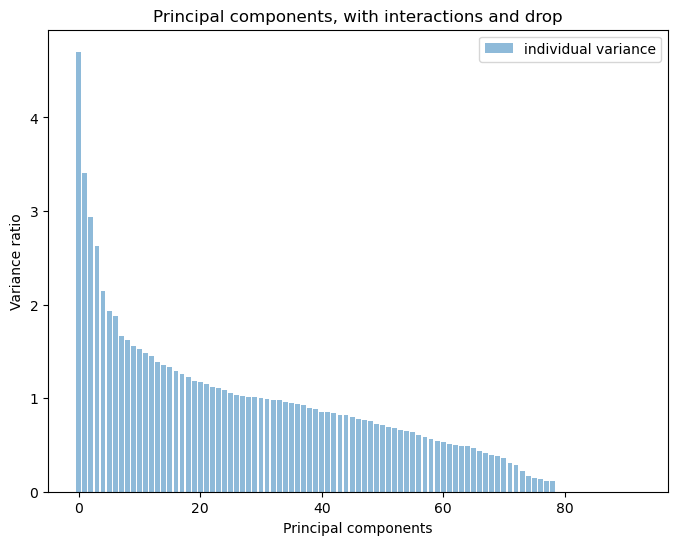

In [11]:
X_tr_int = corresponding_features_interaction(X_tr, drop=True)
X_tr_scaled = scaler.fit_transform(X_tr_int)

# Visualize
pca = PCA()
X_pca = pca.fit_transform(X_tr_scaled)
pca_variance = pca.explained_variance_

plt.figure(figsize=(8, 6))
plt.title('Principal components, with interactions and drop')
plt.bar(range(pca_variance.size), pca_variance, alpha=0.5, align='center', label='individual variance')
plt.legend()
plt.ylabel('Variance ratio')
plt.xlabel('Principal components')
plt.show()

In [12]:
bound_variance = np.sum(pca_variance)*RATIO
sum_variance = 0

for i in range(pca_variance.size):
    sum_variance = pca_variance[i] + sum_variance
    if sum_variance >= bound_variance:
        useful_feats = i
        break

print(f'Ratio: {RATIO}, bound variance: {bound_variance}')
print(f'---> Useful feats: {i}')
print(f'\tVariance sum: {sum_variance}')
print(f'\tPercentage: {sum_variance*100/np.sum(pca_variance):.2f} %')

Ratio: 0.9, bound variance: 71.13769883351003
---> Useful feats: 57
	Variance sum: 71.46436397997358
	Percentage: 90.41 %


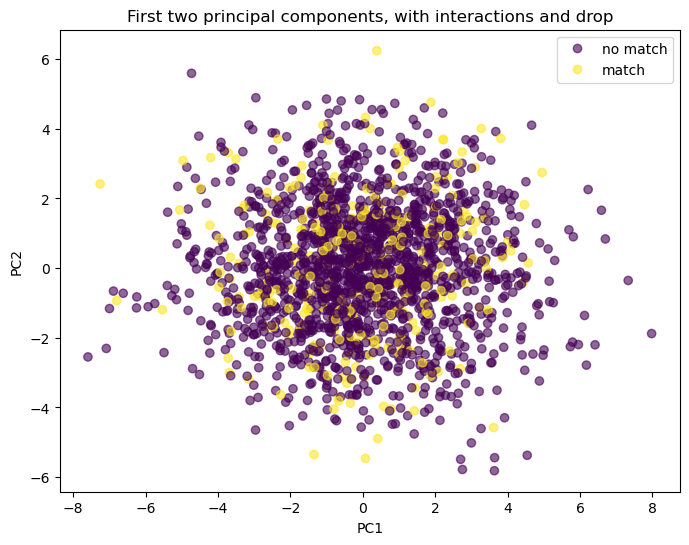

In [13]:
# Show first two principal components with scaler
plt.figure(figsize=(8,6))
plot = plt.scatter(X_pca[:,0], X_pca[:,1], c=y_tr, alpha=0.6)
plt.legend(handles=plot.legend_elements()[0], labels=['no match', 'match'])
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("First two principal components, with interactions and drop")
plt.show()

### 4. With custom feature interaction 

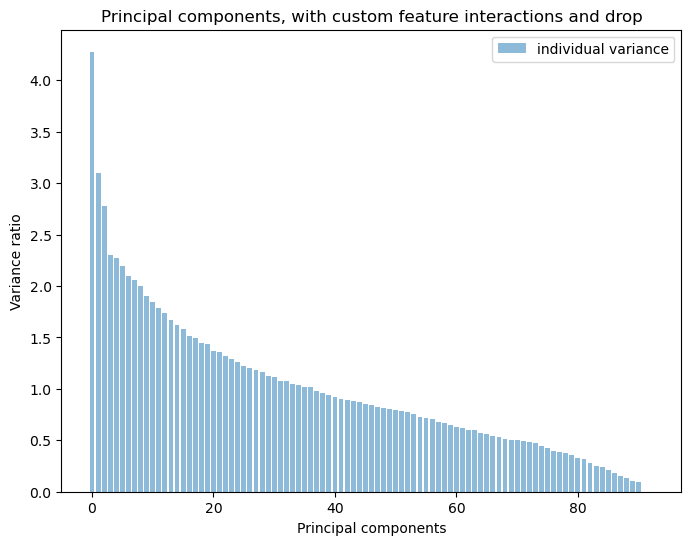

In [14]:
X_tr_int = corresponding_features_interaction(corresponding_features_custom_interaction(X_tr))
X_tr_scaled = scaler.fit_transform(X_tr_int)

# Visualize
pca = PCA()
X_pca = pca.fit_transform(X_tr_scaled)
pca_variance = pca.explained_variance_

plt.figure(figsize=(8, 6))
plt.title('Principal components, with custom feature interactions and drop')
plt.bar(range(pca_variance.size), pca_variance, alpha=0.5, align='center', label='individual variance')
plt.legend()
plt.ylabel('Variance ratio')
plt.xlabel('Principal components')
plt.show()

In [15]:
bound_variance = np.sum(pca_variance)*RATIO
sum_variance = 0

for i in range(pca_variance.size):
    sum_variance = pca_variance[i] + sum_variance
    if sum_variance >= bound_variance:
        useful_feats = i
        break

print(f'Ratio: {RATIO}, bound variance: {bound_variance}')
print(f'---> Useful feats: {i}')
print(f'\tVariance sum: {sum_variance}')
print(f'\tPercentage: {sum_variance*100/np.sum(pca_variance):.2f} %')

Ratio: 0.9, bound variance: 82.84390243902443
---> Useful feats: 65
	Variance sum: 83.31809707240251
	Percentage: 90.52 %


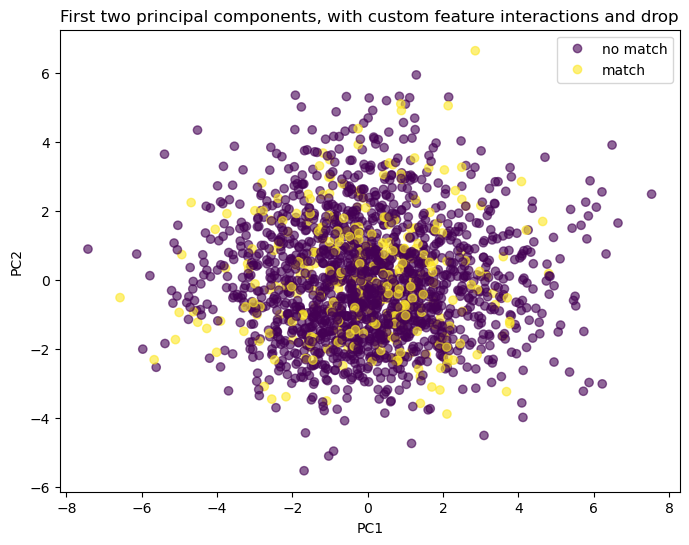

In [16]:
# Show first two principal components with scaler
plt.figure(figsize=(8,6))
plot = plt.scatter(X_pca[:,0], X_pca[:,1], c=y_tr, alpha=0.6)
plt.legend(handles=plot.legend_elements()[0], labels=['no match', 'match'])
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("First two principal components, with custom feature interactions and drop")
plt.show()

### References
1. [Dimensionality Reduction in Python with Scikit-Learn](https://stackabuse.com/dimensionality-reduction-in-python-with-scikit-learn/)
2. [Principal Component Analysis for visualization](https://machinelearningmastery.com/principal-component-analysis-for-visualization/)